# Comparing statistics to Python

The purpose of this notebook is to generate a few comparison statistics for time using `networkx`'s implementation of finding maximal independent sets.

In [1]:
from collections import Counter
from itertools import repeat
import multiprocessing as mp

import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.approximation.independent_set import maximum_independent_set
import pandas as pd

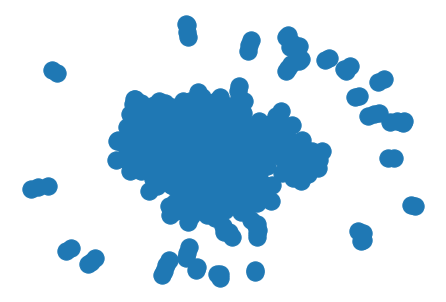

In [4]:
# Read the network
# infile = "examples/test_edgelist.txt"
infile = "gnm_edgelist.txt"

g = nx.read_edgelist(infile)
nx.draw(g)
plt.show()

In [ ]:
%%time

# Compare to the same number of iterations using Python

def job(g):
    x = nx.maximal_independent_set(g)
    return len(x)

n = 1_000_000

with mp.Pool(4) as p:
    data = p.map(job, repeat(g, n))
    
print(max(data))
print(min(data))